In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Book1.csv')

In [3]:
data.head()

,Even's Credit Score,Loan Amount,Characteristic,Repayed
0,40,41240,I,N
1,58,9156,C,Y
2,9,1220,D,N
3,35,37834,C,N
4,3,36062,S,N


In [4]:
data.columns

Index(['Even's Credit Score', 'Loan Amount', 'Characteristic', 'Repayed'], dtype='object')

In [5]:
data.describe()

,Even's Credit Score,Loan Amount
count,300.000000,300.000000
mean,50.210000,25013.873333
std,29.149239,14050.297805
min,0.000000,538.000000
25%,24.750000,12796.000000
50%,53.000000,25209.500000
75%,74.000000,36464.500000
max,100.000000,49970.000000


In [6]:
data.corr()

,Even's Credit Score,Loan Amount
Even's Credit Score,1.000000,0.054815
Loan Amount,0.054815,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Correlation Factors Heat Map')

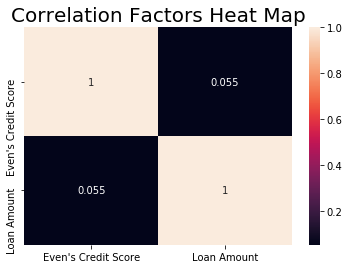

In [8]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [23]:
data=pd.get_dummies(data, columns=['Characteristic', 'Repayed'])

In [24]:
data.head()

,Even's Credit Score,Loan Amount,Characteristic_C,Characteristic_D,Characteristic_I,Characteristic_P,Characteristic_S,Repayed_N,Repayed_Y
0,40,41240,0,0,1,0,0,1,0
1,58,9156,1,0,0,0,0,0,1
2,9,1220,0,1,0,0,0,1,0
3,35,37834,1,0,0,0,0,1,0
4,3,36062,0,0,0,0,1,1,0


In [25]:
data.columns

Index(['Even's Credit Score', 'Loan Amount', 'Characteristic_C',
       'Characteristic_D', 'Characteristic_I', 'Characteristic_P',
       'Characteristic_S', 'Repayed_N', 'Repayed_Y'],
      dtype='object')

In [26]:
data=data.drop(['Characteristic_S', 'Repayed_N'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=data[['Even\'s Credit Score', 'Loan Amount', 'Characteristic_C',
       'Characteristic_D', 'Characteristic_I', 'Characteristic_P']]

In [29]:
y=data['Repayed_Y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()
log.fit(X_train,y_train)

/Users/prakirn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
predictions = log.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.84      0.93      0.89        46

   micro avg       0.89      0.89      0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



In [36]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R_squared = metrics.r2_score(y_test, predictions)
pd.DataFrame(data=[MAE, MSE, RMSE, R_squared], index=['MAE', 'MSE', 'RMSE', 'R Squared'], columns=['Value'])

,Value
MAE,7.808081
MSE,0.111111
RMSE,0.333333
R Squared,0.553322


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,predictions)

array([[45,  8],
       [ 3, 43]])

In [39]:
predictions

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [ ]:
def pre(ecs, la, ch):
    if(ch=="C"):
        data.